In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import FINE.spagat.RE_representation_utils as RE_rep_utils
from FINE.spagat.RE_representation import represent_RE_technology, get_one_REtech_per_region

 C:\Users\s.patil\Anaconda3\envs\europeanmodel\lib\importlib\_bootstrap.py:219: RuntimeWarning:numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
 C:\Users\s.patil\Anaconda3\envs\europeanmodel\lib\importlib\_bootstrap.py:219: RuntimeWarning:numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Import data and shapefiles 

In [4]:
shapefile = f'InputData/Shapefiles/CZE.shp'

GRIDDED_WIND_DATA_PATH = f'InputData/CZE_wind.nc4'
GRIDDED_PV_DATA_PATH = f'InputData/CZE_pv.nc4'

In [5]:
gridded_wind_ds = xr.open_dataset(GRIDDED_WIND_DATA_PATH)
gridded_pv_ds = xr.open_dataset(GRIDDED_PV_DATA_PATH)

 C:\Users\s.patil\Anaconda3\envs\europeanmodel\lib\importlib\_bootstrap.py:219: RuntimeWarning:numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Rasterize datasets based on the shapefile

In [7]:
rasterized_wind_ds = RE_rep_utils.add_shapes_from_shp(gridded_wind_ds,
                                        shapefile, 
                                        index_col='e-id', 
                                        geometry_col='geometry',
                                        longitude='x', 
                                        latitude='y')

rasterized_pv_ds = RE_rep_utils.add_shapes_from_shp(gridded_pv_ds,
                                        shapefile, 
                                        index_col='e-id', 
                                        geometry_col='geometry',
                                        longitude='x', 
                                        latitude='y')

## Aggregation of time series 

### 1 wind turbine and PV type per region

In [8]:
aggregated_wind_ds = get_one_REtech_per_region(rasterized_wind_ds)

aggregated_pv_ds = get_one_REtech_per_region(rasterized_pv_ds)

Number of time series in 39_cz: 364
Number of time series in 40_cz: 213
elapsed time for get_one_REtech_per_region: 0.02 minutes
Number of time series in 39_cz: 333
Number of time series in 40_cz: 190
elapsed time for get_one_REtech_per_region: 0.02 minutes


## Representation of time series 

### Desired number of wind turbine and PV types per region (Possibilites - 2 to (1 less than the number of time series originally present in the region))

#### 5 per region

In [9]:
represented_5_wind_ds = represent_RE_technology(rasterized_RE_ds=rasterized_wind_ds, n_timeSeries_perRegion=5)

represented_5_pv_ds = represent_RE_technology(rasterized_RE_ds=rasterized_pv_ds, n_timeSeries_perRegion=5)

Number of time series in 39_cz: 364
Number of time series in 40_cz: 213
elapsed time for represent_RE_technology: 0.03 minutes
Number of time series in 39_cz: 333
Number of time series in 40_cz: 190
elapsed time for represent_RE_technology: 0.03 minutes


#### 10 per region

In [10]:
represented_10_wind_ds = represent_RE_technology(rasterized_RE_ds=rasterized_wind_ds, n_timeSeries_perRegion=10)

represented_10_pv_ds = represent_RE_technology(rasterized_RE_ds=rasterized_pv_ds, n_timeSeries_perRegion=10)

Number of time series in 39_cz: 364
Number of time series in 40_cz: 213
elapsed time for represent_RE_technology: 0.03 minutes
Number of time series in 39_cz: 333
Number of time series in 40_cz: 190
elapsed time for represent_RE_technology: 0.03 minutes


## Plots 

#### 1. Distribution of represented capacities in all regions  (Violin plot)

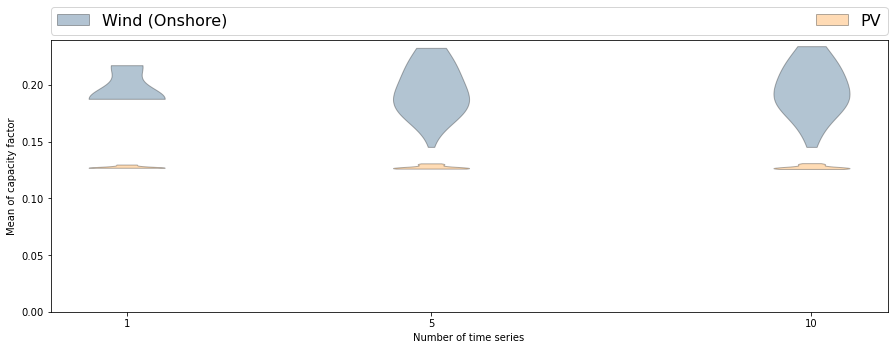

In [14]:
fzj_color_list_strong = ['#023d6b', '#ff8c0c', '#df0f44', '#6d268e', '#adbde3','#30a93b', '#ffe900']

fig, ax = plt.subplots(figsize=(15,5))

# 1 TIME SERIES PER REGION 
## get data 
wind_capfac = aggregated_wind_ds['capfac']
wind_capacity = aggregated_wind_ds['capacity']

pv_capfac = aggregated_pv_ds['capfac']
pv_capacity = aggregated_pv_ds['capacity']

d_wind = wind_capfac.mean(dim='time').values.flatten() 
w_wind = wind_capacity.values.flatten()

d_pv = pv_capfac.mean(dim='time').values.flatten()
w_pv = pv_capacity.values.flatten()

n = 1

## plot wind data
RE_rep_utils.plot_violin_plot(data=d_wind, weights=w_wind, position=n, color=fzj_color_list_strong[0], ax=ax, widths=1)
## plot pv data 
RE_rep_utils.plot_violin_plot(data=d_pv, weights=w_pv, position=n, color=fzj_color_list_strong[1], ax=ax, widths=1)

# 5 TIME SERIES PER REGION 
## get data 
wind_capfac = represented_5_wind_ds['capfac']
wind_capacity = represented_5_wind_ds['capacity']

pv_capfac = represented_5_pv_ds['capfac']
pv_capacity = represented_5_pv_ds['capacity']

d_wind = wind_capfac.mean(dim='time').values.flatten() 
w_wind = wind_capacity.values.flatten()

d_pv = pv_capfac.mean(dim='time').values.flatten()
w_pv = pv_capacity.values.flatten()

n = 5

## plot wind data
RE_rep_utils.plot_violin_plot(data=d_wind, weights=w_wind, position=n, color=fzj_color_list_strong[0], ax=ax, widths=1)
## plot pv data 
RE_rep_utils.plot_violin_plot(data=d_pv, weights=w_pv, position=n, color=fzj_color_list_strong[1], ax=ax, widths=1)

# 10 TIME SERIES PER REGION 

wind_capfac = represented_10_wind_ds['capfac']
wind_capacity = represented_10_wind_ds['capacity']

pv_capfac = represented_10_pv_ds['capfac']
pv_capacity = represented_10_pv_ds['capacity']

d_wind = wind_capfac.mean(dim='time').values.flatten() 
w_wind = wind_capacity.values.flatten()

d_pv = pv_capfac.mean(dim='time').values.flatten()
w_pv = pv_capacity.values.flatten()

n = 10

## plot wind data
RE_rep_utils.plot_violin_plot(data=d_wind, weights=w_wind, position=n, color=fzj_color_list_strong[0], ax=ax, widths=1)
## plot pv data 
RE_rep_utils.plot_violin_plot(data=d_pv, weights=w_pv, position=n, color=fzj_color_list_strong[1], ax=ax, widths=1)

y_pos = [1, 5, 10]
x_tick_labels = [1, 5, 10]

plt.xticks(y_pos , x_tick_labels)
plt.ylabel('Mean of capacity factor')
plt.xlabel('Number of time series')
ax.set_ylim(bottom=0)
#custom legend
wind_patch = mpatches.Patch(edgecolor='black', facecolor=fzj_color_list_strong[0], alpha = 0.3, label='Wind (Onshore)')
pv_patch = mpatches.Patch(edgecolor='black', facecolor=fzj_color_list_strong[1], alpha = 0.3, label='PV')
plt.legend(handles=[wind_patch, pv_patch], bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
               mode="expand", borderaxespad=0, ncol=4, prop={"size":16})
#save figure   
#pto.plt_savefig(save_name='Violin_W', path='/home/s-patil/code/spagatti_development/spagat/Representation_analysis/Results/Plots', fig=fig)